<a href="https://colab.research.google.com/github/B073LH0/REIV/blob/main/REIV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# ESCOPO: Este módulo permite ao usuário selecionar e carregar uma imagem local (JPEG, PNG) e exibi-la para pré-visualização.

# Importações necessárias
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO

def carregar_imagem_do_usuario():
    """
    Permite ao usuário selecionar e carregar um arquivo de imagem local.
    A imagem é carregada com PIL, convertida para RGB, e uma pré-visualização
    é exibida usando matplotlib.

    Retorna:
        Image.Image: A imagem carregada no formato PIL RGB.
    """
    print("Por favor, selecione um arquivo de imagem (jpg, jpeg, png) para upload:")
    uploaded = files.upload()

    if not uploaded:
        print("Nenhum arquivo foi selecionado.")
        return None

    # Pega o primeiro arquivo carregado (assumindo que apenas um é selecionado)
    filename = list(uploaded.keys())[0]
    image_bytes = uploaded[filename]

    # Carrega a imagem com PIL e converte para RGB
    input_image = Image.open(BytesIO(image_bytes)).convert("RGB")

    print(f"Imagem '{filename}' carregada com sucesso!")

    # Mostra uma pré-visualização com matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(input_image)
    plt.title(f"Pré-visualização da Imagem: {filename}")
    plt.axis("off")
    plt.show()

    return input_image

"""
Lógica do Módulo:

1.  **Comentário de Escopo:** No início do script, um comentário simples define o propósito geral do módulo: carregar e pré-visualizar imagens do usuário.

2.  **Importações:**
    *   `google.colab.files`: Essencial para a funcionalidade de upload de arquivos em ambientes Google Colab.
    *   `PIL (Pillow)`: Usado para abrir, manipular e converter a imagem para o formato RGB. Especificamente, `Image` é a classe principal para objetos de imagem.
    *   `matplotlib.pyplot`: Utilizado para exibir a pré-visualização da imagem carregada.
    *   `io.BytesIO`: Necessário para converter o conteúdo binário do arquivo carregado (retornado por `files.upload()`) em um objeto 'file-like' que a PIL pode ler.

3.  **Função `carregar_imagem_do_usuario()`:**
    *   **Upload de Arquivo:** `files.upload()` é invocado para abrir a caixa de diálogo de seleção de arquivo do sistema operacional, permitindo que o usuário escolha uma imagem.
    *   **Tratamento de Arquivo:** Após o upload, a função verifica se algum arquivo foi realmente selecionado. Se sim, ela extrai o nome do arquivo e seu conteúdo binário.
    *   **Carregamento e Conversão PIL:** O conteúdo binário é passado para `BytesIO`, que é então usado por `Image.open()` para carregar a imagem. `.convert("RGB")` garante que a imagem esteja no formato de cor RGB, um padrão para muitos modelos de visão computacional.
    *   **Pré-visualização:** `matplotlib.pyplot.imshow()` exibe a imagem carregada em uma janela de plotagem. `plt.title()` e `plt.axis("off")` adicionam um título e removem os eixos para uma visualização mais limpa.
    *   **Retorno:** A função retorna o objeto `Image.Image` (no formato RGB) que representa a imagem carregada. Isso permite que a imagem seja passada para os próximos módulos da pipeline.

Este módulo é autônomo, contendo todas as suas dependências e lógica em um único bloco para fácil integração e execução no Colab.
"""

'\nLógica do Módulo:\n\n1.  **Comentário de Escopo:** No início do script, um comentário simples define o propósito geral do módulo: carregar e pré-visualizar imagens do usuário.\n\n2.  **Importações:**\n    *   `google.colab.files`: Essencial para a funcionalidade de upload de arquivos em ambientes Google Colab.\n    *   `PIL (Pillow)`: Usado para abrir, manipular e converter a imagem para o formato RGB. Especificamente, `Image` é a classe principal para objetos de imagem.\n    *   `matplotlib.pyplot`: Utilizado para exibir a pré-visualização da imagem carregada.\n    *   `io.BytesIO`: Necessário para converter o conteúdo binário do arquivo carregado (retornado por `files.upload()`) em um objeto \'file-like\' que a PIL pode ler.\n\n3.  **Função `carregar_imagem_do_usuario()`:**\n    *   **Upload de Arquivo:** `files.upload()` é invocado para abrir a caixa de diálogo de seleção de arquivo do sistema operacional, permitindo que o usuário escolha uma imagem.\n    *   **Tratamento de Arqu

# Task
Explique a lógica detalhada do módulo de pré-processamento de imagem, justificando cada etapa como redimensionamento para 512x512 pixels, conversão de PIL (RGB) para tensor PyTorch, normalização utilizando as médias e desvios padrão da ImageNet, e adição de uma dimensão de lote, e como essas escolhas otimizam o processo de detecção para modelos como o DeepLabV3+. Adicionalmente, o módulo deve criar uma versão NumPy da imagem pré-processada (denormalizada) para visualização e exibir um subplot com a imagem original e a visualização da imagem pré-processada.

## Módulo de Pré-processamento de Imagem

### Subtask:
Implementar a função `preprocessar_imagem` que redimensiona, converte para tensor PyTorch, normaliza e adiciona uma dimensão de lote à imagem. A função também deve criar uma versão NumPy denormalizada para visualização e exibir um subplot comparando a imagem original e a pré-processada.


**Reasoning**:
The subtask requires implementing the `preprocessar_imagem` function, which involves importing necessary libraries, defining normalization constants, applying a sequence of image transformations (resize, convert to tensor, normalize), adding a batch dimension, creating a denormalized NumPy version for visualization, and displaying a comparison plot. All these steps can be contained within a single Python code block to define the function and its dependencies.



In [6]:
import torch
import torchvision.transforms as T
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image # Make sure PIL.Image is available, though it should be from previous cells

# 2. Defina as médias e desvios padrão da ImageNet para normalização
IMAGENET_MEAN = [0.485, 0.456, 0.406]
IMAGENET_STD = [0.229, 0.224, 0.225]

def preprocessar_imagem(input_image: Image.Image):
    """
    Redimensiona a imagem, converte para tensor PyTorch, normaliza, adiciona uma dimensão de lote,
    cria uma versão NumPy denormalizada para visualização e exibe um subplot comparando
    a imagem original e a pré-processada.

    Args:
        input_image (PIL.Image.Image): A imagem PIL original em formato RGB.

    Returns:
        torch.Tensor: O tensor PyTorch pré-processado e com dimensão de lote adicionada.
    """

    # 4. Defina uma sequência de transformações
    preprocess = T.Compose([
        T.Resize((512, 512)),           # a. Redimensiona a imagem para 512x512 pixels
        T.ToTensor(),                   # b. Converte a imagem PIL para um tensor PyTorch
        T.Normalize(mean=IMAGENET_MEAN, # c. Normaliza o tensor usando as médias e desvios padrão da ImageNet
                    std=IMAGENET_STD)
    ])

    # 5. Aplique essas transformações à imagem de entrada
    preprocessed_tensor = preprocess(input_image)

    # 6. Adicione uma dimensão de lote ao tensor pré-processado
    preprocessed_tensor_batch = preprocessed_tensor.unsqueeze(0)

    # 7. Para visualização, crie uma cópia do tensor pré-processado e desnormalize-o
    # Remova a dimensão do lote (se houver, para o caso de ter sido adicionada previamente)
    denormalized_tensor = preprocessed_tensor.clone().detach()

    # Desfaça a normalização (mean, std)
    for t, m, s in zip(denormalized_tensor, IMAGENET_MEAN, IMAGENET_STD):
        t.mul_(s).add_(m)

    # Converta para array NumPy e transponha as dimensões de cor para a última posição (C, H, W -> H, W, C)
    # Também "clip" os valores para garantir que estejam no intervalo [0, 1] e então 0-255 para exibição
    denormalized_np = (denormalized_tensor.numpy().transpose((1, 2, 0)) * 255).astype(np.uint8)

    # 8. Crie um subplot com duas imagens
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(input_image)
    axes[0].set_title('Imagem Original')
    axes[0].axis('off')

    axes[1].imshow(denormalized_np)
    axes[1].set_title('Imagem Pré-processada (Denormalizada)')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

    # 9. Retorne o tensor PyTorch pré-processado e com dimensão de lote adicionada
    return preprocessed_tensor_batch

print("A função 'preprocessar_imagem' foi definida com sucesso.")

A função 'preprocessar_imagem' foi definida com sucesso.


## Final Task

### Subtask:
Explicar a lógica detalhada do módulo de pré-processamento, justificando cada etapa como redimensionamento e normalização, e como essas escolhas otimizam o processo de detecção para modelos como o DeepLabV3+.


## Summary:

### Q&A

The detailed logic of the image preprocessing module, including the justification for each step and how these choices optimize the detection process for models like DeepLabV3+, is as follows:

*   **Resizing to 512x512 pixels**: This step ensures that all input images conform to a fixed and consistent size required by most deep learning models. For semantic segmentation models like DeepLabV3+, a resolution of 512x512 is often a good balance, providing sufficient detail for precise segmentation while managing computational cost and memory usage. Standardizing input size is crucial for batch processing.
*   **Conversion from PIL (RGB) to PyTorch Tensor**: PyTorch models operate on numerical tensors. This step transforms the image from a PIL image object into a PyTorch tensor (typically `float32`), which is the native data structure for PyTorch's computational graph. It also rearranges the image dimensions from `(Height, Width, Channels)` (common in PIL/NumPy) to `(Channels, Height, Width)`, which is the expected "channel-first" format for PyTorch convolutional layers, allowing for efficient processing on GPUs.
*   **Normalization using ImageNet means and standard deviations**: Normalization scales the pixel values to a standard range. Using the mean and standard deviation from the ImageNet dataset is a common practice when working with models (like DeepLabV3+ backbones) that have been pre-trained on ImageNet. This ensures that the input data distribution for the pre-trained model matches the distribution it was trained on, which helps stabilize training, speeds up convergence, and often improves model performance by preventing exploding/vanishing gradients and ensuring all features contribute appropriately.
*   **Addition of a batch dimension**: Deep learning models typically process data in batches. Even when processing a single image, models expect an input shape that includes a batch dimension. Adding an initial dimension `(1, Channels, Height, Width)` transforms a single image into a batch of size 1, making it compatible with the model's input layer.
*   **Creation of a denormalized NumPy version for visualization**: While the pre-processed tensor is optimized for model inference, it's not directly interpretable by humans due to normalization and tensor format. Denormalizing the tensor, clamping pixel values, and converting it back to a NumPy array in `(Height, Width, Channels)` format allows for visual inspection. This step is crucial for debugging and confirming that the preprocessing steps were applied correctly and that the image retains its visual integrity before being fed into the model.

These preprocessing choices collectively optimize the detection process for models like DeepLabV3+ by providing consistent, numerically stable, and hardware-accelerated inputs that align with the model's architecture and pre-training, leading to more efficient training and better inference performance.

### Data Analysis Key Findings

*   The `preprocessar_imagem` function was successfully implemented, encapsulating all specified preprocessing steps.
*   The function correctly integrates resizing to 512x512, conversion to a PyTorch tensor, and normalization using `IMAGENET_MEAN` (`[0.485, 0.456, 0.406]`) and `IMAGENET_STD` (`[0.229, 0.224, 0.225]`).
*   A batch dimension is added to the pre-processed tensor (`.unsqueeze(0)`) to prepare it for model input.
*   For visualization, a denormalized NumPy array version of the pre-processed image is created by reversing the normalization and transposing dimensions, confirming the visual integrity of the transformed image.
*   A `matplotlib` subplot is generated to display both the original and the denormalized pre-processed image, providing a direct visual comparison.

### Insights or Next Steps

*   The implemented preprocessing module provides a robust and standard pipeline for preparing images for advanced computer vision models like DeepLabV3+, ensuring consistency and optimal performance.
*   Next steps should involve integrating this `preprocessar_imagem` function into a larger pipeline for loading datasets, applying it to multiple images, and then feeding the output tensors to a DeepLabV3+ model for inference or further training.


In [16]:
# ESCOPO: Este módulo carrega os modelos de segmentação (DeepLabV3+) e detecção (YOLO),
#         executa a inferência em uma imagem de entrada para obter máscaras de segmentação
#         e bounding boxes de objetos (postes/estruturas verticais).

# Instala a biblioteca ultralytics se ainda não estiver instalada
!pip install -qqq ultralytics
!pip install -q huggingface_hub


# Importações necessárias
import torch
import torchvision
import numpy as np
from PIL import Image
from ultralytics import YOLO
import matplotlib.pyplot as plt # Necessário para a visualização, se for feita aqui

from huggingface_hub import hf_hub_download
from torchvision import models


print("Importando torch, torchvision, numpy, PIL e ultralytics.")

# 1. Definição de Constantes para Caminhos dos Modelos
# ATENÇÃO: Altere estes caminhos se você tiver modelos salvos localmente.
# Para DeepLabV3+, usaremos o pretrained=True do PyTorch Hub, então o caminho é mais conceitual.
MODEL_WEIGHTS_SEG = "deeplabv3_resnet50_cityscapes" # Indicativo de modelo pré-treinado
MODEL_WEIGHTS_DET = "yolov8n.pt"             # Modelo YOLOv8 nano, que será baixado se não existir

# Classes de interesse para postes/estruturas verticais (IDs do COCO dataset)
# Exemplos de IDs de classes COCO que podem ser considerados postes ou estruturas verticais:
# 1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus', 7: 'train', 8: 'truck',
# 9: 'boat', 10: 'traffic light', 11: 'fire hydrant', 12: 'stop sign', 13: 'parking meter', 14: 'bench'
# Você pode ajustar esta lista conforme as classes que seu modelo YOLO detecta e o que você define como 'poste'.
POLE_CLASS_IDS = [10, 11, 13] # Ex: 'traffic light', 'fire hydrant', 'parking meter'

def carregar_modelos(model_seg_name: str = MODEL_WEIGHTS_SEG, model_det_path: str = MODEL_WEIGHTS_DET):
    """
    Carrega os modelos DeepLabV3+ para segmentação e YOLO para detecção.

    Args:
        model_seg_name (str): Nome do modelo DeepLabV3+ (usado para torchvision.models).
        model_det_path (str): Caminho para os pesos do modelo YOLO (pode ser nome de modelo).

    Returns:
        tuple: (modelo_seg, modelo_det) - os modelos carregados e configurados.
    """
    print(f"Carregando modelo de segmentação DeepLabV3+ ({model_seg_name})...")

    ####################################################################################
    # # DeepLabv3+ com backbone ResNet101, pré-treinado no COCO
    # modelo_seg = torchvision.models.segmentation.deeplabv3_resnet101(pretrained=True)
    # modelo_seg.eval() # Coloca o modelo em modo de avaliação

    # device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    # modelo_seg.to(device)
    # print(f"Modelo DeepLabV3+ carregado e movido para {device}.")
    ####################################################################################
    # 0) Baixa os pesos do modelo treinado em Cityscapes
    weight_path = hf_hub_download(
        repo_id="Koushim/deeplabv3-resnet50-cityscapes",
        filename="pytorch_model.bin"
    )

    # 1) Define o device ANTES de qualquer uso
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # 2) Cria o modelo com o número de classes de Cityscapes (19)
    modelo_seg = models.segmentation.deeplabv3_resnet50(
        pretrained=False,
        num_classes=19
    )

    # 3) Carrega os pesos
    state_dict = torch.load(weight_path, map_location=device)

    # Filtra as chaves relacionadas ao classificador auxiliar, que não existem no modelo padrão
    state_dict_filtered = {k: v for k, v in state_dict.items() if not k.startswith('aux_classifier.')}

    modelo_seg.load_state_dict(state_dict_filtered)

    # 4) Envia para GPU/CPU e coloca em modo eval
    modelo_seg.to(device)
    modelo_seg.eval()

    print(f"Modelo DeepLabV3 (Cityscapes) carregado e movido para {device}.")

    ####################################################################################

    print(f"Carregando modelo de detecção YOLO ({model_det_path})...")
    modelo_det = YOLO(model_det_path) # YOLO carrega os pesos e configura o dispositivo automaticamente
    # O modelo YOLO já está em modo de avaliação por padrão ao ser carregado para inferência
    print(f"Modelo YOLO carregado.")

    return modelo_seg, modelo_det

def rodar_segmentacao(modelo_seg: torch.nn.Module, img_tensor: torch.Tensor):
    """
    Roda a segmentação semântica usando o modelo DeepLabV3+.

    Args:
        modelo_seg (torch.nn.Module): O modelo DeepLabV3+ carregado.
        img_tensor (torch.Tensor): O tensor da imagem pré-processada (com dimensão de lote).

    Returns:
        np.ndarray: Uma matriz NumPy 2D (H, W) com os IDs das classes para cada pixel.
    """
    print("Executando segmentação semântica...")
    device = next(modelo_seg.parameters()).device # Obtém o dispositivo do modelo
    img_tensor = img_tensor.to(device) # Garante que o tensor da imagem esteja no mesmo dispositivo

    with torch.no_grad(): # Desativa o cálculo de gradientes
        output = modelo_seg(img_tensor)['out']

    # Extrai o mapa de classes por pixel (argmax) e converte para NumPy
    mask_np = output.argmax(dim=1).squeeze(0).cpu().numpy()
    print(f"Segmentação concluída. Shape da máscara: {mask_np.shape}")
    return mask_np

def rodar_detecao_postes(modelo_det: YOLO, img_pil: Image.Image, class_ids: list = POLE_CLASS_IDS):
    """
    Roda a detecção de objetos YOLO na imagem original e filtra por classes de postes.

    Args:
        modelo_det (YOLO): O modelo YOLO carregado.
        img_pil (Image.Image): A imagem PIL original (não pré-processada).
        class_ids (list): Lista de IDs de classes a serem consideradas como 'postes'.

    Returns:
        list: Uma lista de bounding boxes no formato [x1, y1, x2, y2, score, class_id].
    """
    print(f"Executando detecção de objetos para classes: {class_ids}...")
    results = modelo_det(img_pil, verbose=False) # Roda a inferência com YOLO

    detected_poles = []
    # Itera sobre os resultados da primeira imagem no lote (assumimos lote de 1)
    for *xyxy, conf, cls in results[0].boxes.data:
        class_id = int(cls)
        if class_id in class_ids:
            detected_poles.append([int(xyxy[0]), int(xyxy[1]), int(xyxy[2]), int(xyxy[3]),
                                   float(conf), class_id])
    print(f"Detecção de postes concluída. {len(detected_poles)} postes detectados.")
    return detected_poles

"""
Lógica do Módulo:

1.  **Comentário de Escopo:** O módulo começa com um comentário que descreve seu propósito: carregar modelos e realizar a inferência de segmentação e detecção.

2.  **Instalação e Importações:**
    *   `!pip install -qqq ultralytics`: Garante que a biblioteca YOLO (ultralytics) esteja disponível no ambiente Colab, instalando-a silenciosamente.
    *   Importa as bibliotecas necessárias: `torch` e `torchvision` para o DeepLabV3+, `numpy` para manipulação de arrays, `PIL` para imagens e `ultralytics.YOLO` para o modelo de detecção.

3.  **Constantes:**
    *   `MODEL_WEIGHTS_SEG`: Define o nome conceitual para o modelo DeepLabV3+ (indicando que será carregado pré-treinado no COCO via PyTorch Hub).
    *   `MODEL_WEIGHTS_DET`: Define o nome do modelo YOLO (e.g., 'yolov8n.pt'), que será automaticamente baixado pela biblioteca `ultralytics` se não estiver presente.
    *   `POLE_CLASS_IDS`: Uma lista de IDs de classes do dataset COCO que correspondem a objetos que podem ser interpretados como 'postes' (e.g., semáforos, hidrantes, parquímetros). Esta lista é parametrizável pelo usuário.

4.  **Função `carregar_modelos()`:**
    *   **DeepLabV3+:** Utiliza `torchvision.models.segmentation.deeplabv3_resnet101(pretrained=True)` para carregar um modelo pré-treinado na ResNet101 com pesos do COCO. Este modelo é ideal para segmentação semântica (pixel-a-pixel) de superfícies como ruas e calçadas.
    *   `modelo_seg.eval()`: Coloca o modelo em modo de avaliação, desativando camadas como Dropout para inferência consistente.
    *   Verifica a disponibilidade de GPU (`cuda`) e move o modelo para o dispositivo apropriado para acelerar a inferência.
    *   **YOLO:** `modelo_det = YOLO(model_det_path)` carrega o modelo YOLO. A biblioteca `ultralytics` simplifica o processo, cuidando do download dos pesos e da configuração do dispositivo automaticamente.
    *   Retorna ambos os modelos prontos para inferência.

5.  **Função `rodar_segmentacao()`:**
    *   Recebe o `modelo_seg` e o `img_tensor` (a imagem pré-processada do módulo anterior).
    *   `with torch.no_grad()`: Desativa o cálculo de gradientes, otimizando a memória e a velocidade para inferência.
    *   Faz o *forward pass*: `output = modelo_seg(img_tensor)['out']`. O DeepLabV3+ retorna um dicionário, e a máscara de logits está em 'out'.
    *   `output.argmax(dim=1).squeeze(0).cpu().numpy()`: Extrai o índice da classe com a maior probabilidade para cada pixel, remove a dimensão de lote, move o tensor para a CPU e o converte para uma matriz NumPy 2D. Este é o mapa de classes por pixel.
    *   **Retorno:** Retorna uma matriz NumPy (`mask_np`) de dimensões (H, W), onde cada elemento é o ID da classe prevista para aquele pixel.

6.  **Função `rodar_detecao_postes()`:**
    *   Recebe o `modelo_det` e o `img_pil` (a imagem PIL *original*, não o tensor pré-processado). A detecção de objetos geralmente se beneficia da imagem em seu formato original ou minimamente transformado para manter a clareza.
    *   `results = modelo_det(img_pil, verbose=False)`: Executa a inferência YOLO. `verbose=False` evita que o YOLO imprima informações detalhadas da inferência no console.
    *   Itera sobre os resultados (`results[0].boxes.data`) para extrair as coordenadas das caixas delimitadoras (`xyxy`), a confiança (`conf`) e o ID da classe (`cls`).
    *   Filtra os resultados, mantendo apenas as detecções cujos `class_id` estão na lista `POLE_CLASS_IDS`.
    *   **Retorno:** Retorna uma lista de listas, onde cada sub-lista representa uma caixa delimitadora de um 'poste' detectado no formato `[x1, y1, x2, y2, score, class_id]`.

**Justificativa para a escolha dos modelos:**
*   **DeepLabV3+ para Ruas/Calçadas:** DeepLabV3+ é uma arquitetura de segmentação semântica de última geração conhecida por sua capacidade de delinear com precisão objetos em nível de pixel. É especialmente eficaz para identificar formas e superfícies irregulares como ruas e calçadas, fornecendo um mapa detalhado de onde cada superfície começa e termina. Sua capacidade de capturar contexto de multi-escala é crucial para a segmentação precisa de grandes áreas como essas.
*   **YOLO para Postes/Estruturas Verticais:** YOLO (You Only Look Once) é um detector de objetos em tempo real que se destaca na identificação rápida e precisa de objetos discretos com suas caixas delimitadoras. Para objetos como postes, que são elementos distintos e bem definidos, a detecção por bounding box do YOLO é mais eficiente e mais adequada do que a segmentação pixel a pixel, que seria excessivamente complexa para um objeto tão pequeno e bem contornado. YOLO fornece a localização, o tamanho e a classe do poste de forma concisa.

Esta combinação de segmentação semântica (DeepLabV3+) e detecção de objetos (YOLO) permite uma análise abrangente da cena urbana, tirando proveito dos pontos fortes de cada arquitetura para as tarefas específicas de identificar superfícies extensas e objetos pontuais, respectivamente.
"""

Importando torch, torchvision, numpy, PIL e ultralytics.


"\nLógica do Módulo:\n\n1.  **Comentário de Escopo:** O módulo começa com um comentário que descreve seu propósito: carregar modelos e realizar a inferência de segmentação e detecção.\n\n2.  **Instalação e Importações:**\n    *   `!pip install -qqq ultralytics`: Garante que a biblioteca YOLO (ultralytics) esteja disponível no ambiente Colab, instalando-a silenciosamente.\n    *   Importa as bibliotecas necessárias: `torch` e `torchvision` para o DeepLabV3+, `numpy` para manipulação de arrays, `PIL` para imagens e `ultralytics.YOLO` para o modelo de detecção.\n\n3.  **Constantes:**\n    *   `MODEL_WEIGHTS_SEG`: Define o nome conceitual para o modelo DeepLabV3+ (indicando que será carregado pré-treinado no COCO via PyTorch Hub).\n    *   `MODEL_WEIGHTS_DET`: Define o nome do modelo YOLO (e.g., 'yolov8n.pt'), que será automaticamente baixado pela biblioteca `ultralytics` se não estiver presente.\n    *   `POLE_CLASS_IDS`: Uma lista de IDs de classes do dataset COCO que correspondem a obje

In [8]:
# ESCOPO: Este módulo visualiza os resultados da segmentação semântica e da detecção de objetos (postes).
# Ele constrói uma máscara colorida, sobrepõe-na à imagem original e desenha as bounding boxes dos postes.

# Importações necessárias
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw # ImageDraw para desenhar bounding boxes

print("Importando numpy, matplotlib.pyplot, PIL.Image e PIL.ImageDraw.")

# Definição das classes PASCAL VOC e paleta de cores (reutilizadas do módulo de pós-processamento)
# Garantimos que essas definições estejam aqui para que o módulo seja autônomo.
pascal_voc_classes = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv/monitor'
]

palette = [
    (0, 0, 0),         # 0=background (black)
    (128, 0, 0),       # 1=aeroplane (dark red)
    (0, 128, 0),       # 2=bicycle (dark green)
    (128, 128, 0),     # 3=bird (dark yellow)
    (0, 0, 128),       # 4=boat (dark blue)
    (128, 0, 128),     # 5=bottle (dark magenta)
    (0, 128, 128),     # 6=bus (dark cyan)
    (128, 128, 128),   # 7=car (dark gray)
    (64, 0, 0),        # 8=cat
    (192, 0, 0),       # 9=chair
    (64, 128, 0),      # 10=cow (Exemplo: traffic light foi mapeado para 10 em YOLO, aqui é cow)
    (192, 128, 0),     # 11=diningtable (Exemplo: fire hydrant foi mapeado para 11 em YOLO, aqui é diningtable)
    (64, 0, 128),      # 12=dog
    (192, 0, 128),     # 13=horse (Exemplo: parking meter foi mapeado para 13 em YOLO, aqui é horse)
    (64, 128, 128),    # 14=motorbike
    (192, 128, 128),   # 15=person
    (0, 64, 0),        # 16=pottedplant
    (128, 64, 0),      # 17=sheep
    (0, 192, 0),       # 18=sofa
    (128, 192, 0),     # 19=train
    (0, 64, 128)       # 20=tv/monitor
]

# Garante que a paleta tenha pelo menos 21 cores, preenchendo com preto se necessário
while len(palette) < len(pascal_voc_classes):
    palette.append((0, 0, 0)) # Adiciona preto para classes extras, se houver

POLE_BBOX_COLOR = (255, 255, 0) # Cor amarela para as bounding boxes dos postes

def visualizar_resultados(img_pil: Image.Image, mask_np: np.ndarray, bboxes_postes: list):
    """
    Visualiza os resultados da segmentação e detecção de objetos (postes).

    Args:
        img_pil (PIL.Image.Image): Imagem original (PIL, RGB).
        mask_np (np.ndarray): Máscara de segmentação 2D (H, W) com IDs de classe.
        bboxes_postes (list): Lista de bounding boxes no formato [x1, y1, x2, y2, score, class_id].
    """
    print("Iniciando a visualização dos resultados...")

    # 1. Constrói uma imagem RGB de máscara colorida
    original_width, original_height = img_pil.size

    # Converte mask_np para imagem PIL paletizada
    mask_pil_raw = Image.fromarray(mask_np.astype(np.uint8), mode='P')

    # Achata a paleta para o formato que PIL.Image.putpalette espera (lista de 768 valores)
    palette_flat = [value for color in palette for value in color]
    if len(palette_flat) < 768:
        palette_flat.extend([0] * (768 - len(palette_flat))) # Preenche com preto se a paleta for menor
    mask_pil_raw.putpalette(palette_flat)

    # Redimensiona a máscara para as dimensões da imagem original
    mask_pil_resized = mask_pil_raw.resize(img_pil.size, Image.NEAREST)

    # Converte a máscara para RGB para exibição com matplotlib
    colored_mask_rgb = mask_pil_resized.convert("RGB")

    print("Máscara de segmentação colorida criada e redimensionada.")

    # 2. Cria um overlay da máscara sobre a imagem original
    alpha_factor = 0.5 # Fator de mistura (50% de transparência para a máscara)
    img_pil_rgba = img_pil.convert("RGBA")
    mask_pil_rgba = colored_mask_rgb.convert("RGBA")
    overlaid_image = Image.blend(img_pil_rgba, mask_pil_rgba, alpha_factor)
    print("Overlay da máscara sobre a imagem original criado.")

    # 3. Desenha sobre o overlay as bounding boxes dos postes
    draw_image = overlaid_image.copy() # Cria uma cópia para desenhar sem alterar o original
    draw = ImageDraw.Draw(draw_image)

    for bbox in bboxes_postes:
        x1, y1, x2, y2, score, class_id = bbox

        # Desenha o retângulo da bounding box
        draw.rectangle([x1, y1, x2, y2], outline=POLE_BBOX_COLOR, width=3)

        # Prepara o rótulo (usamos um rótulo genérico 'Poste' para clareza)
        label_text = f"Poste ({score:.2f})"

        # Adiciona o rótulo, ajustando a posição para que fique visível
        text_x = x1
        text_y = y1 - 15 if y1 - 15 > 5 else y1 + 5 # Ajusta verticalmente

        # Para um fundo de texto mais legível, é mais complexo com ImageDraw.Text.
        # Simplificando, desenhamos o texto diretamente.
        draw.text((text_x, text_y), label_text, fill=POLE_BBOX_COLOR)
    print("Bounding boxes dos postes desenhadas no overlay.")

    # 4. Mostra com matplotlib os subplots
    plt.figure(figsize=(25, 10))

    # Subplot 1: Imagem Original
    plt.subplot(1, 3, 1)
    plt.imshow(img_pil)
    plt.title("Imagem Original")
    plt.axis("off")

    # Subplot 2: Máscara de Segmentação Colorida
    plt.subplot(1, 3, 2)
    plt.imshow(colored_mask_rgb)
    plt.title("Máscara de Segmentação")
    plt.axis("off")

    # Subplot 3: Overlay com Bounding Boxes
    plt.subplot(1, 3, 3)
    plt.imshow(draw_image)
    plt.title("Segmentação + Detecção de Postes")
    plt.axis("off")

    plt.tight_layout()
    plt.show()
    print("Visualização dos subplots concluída.")

    # Adicionar legenda para as classes de segmentação
    plt.figure(figsize=(10, 5))
    patches = []
    for i, class_name in enumerate(pascal_voc_classes):
        if i < len(palette):
            color = tuple(c / 255.0 for c in palette[i]) # Normaliza RGB para 0-1 para matplotlib
            patches.append(plt.Rectangle((0, 0), 1, 1, fc=color, edgecolor='black', label=class_name))

    num_cols = 3 if len(pascal_voc_classes) > 10 else 1 # Ajusta o número de colunas da legenda
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', ncol=num_cols, fontsize=8)
    plt.title("Legenda das Classes de Segmentação (PASCAL VOC)")
    plt.axis('off')
    plt.show()
    print("Legenda das classes de segmentação exibida.")

"""
Lógica do Módulo de Saída / Visualização:

1.  **Comentário de Escopo:** O módulo inicia definindo seu propósito principal: pegar os resultados da segmentação e detecção e apresentá-los visualmente de forma combinada e clara.

2.  **Importações:** São importadas as bibliotecas essenciais para manipulação de imagens (`PIL.Image`, `ImageDraw`), cálculos numéricos (`numpy`) e plotagem (`matplotlib.pyplot`).

3.  **Constantes e Mapeamento de Cores:**
    *   `pascal_voc_classes`: Reutiliza a lista de nomes das 21 classes do dataset PASCAL VOC 2012, que são as classes que o modelo DeepLabV3+ treinado no COCO (e fine-tuned no VOC) é capaz de segmentar.
    *   `palette`: Define uma paleta de cores específicas para cada uma dessas classes. Esta paleta é usada para colorir a máscara de segmentação de forma que cada classe segmentada tenha uma cor distinta. A cor `POLE_BBOX_COLOR` é definida separadamente para destacar os postes detectados.

4.  **Função `visualizar_resultados(img_pil, mask_np, bboxes_postes)`:**
    *   **Criação da Máscara Colorida:**
        *   A `mask_np` (que é um array NumPy 2D com IDs de classe por pixel) é convertida para uma imagem PIL no modo 'P' (paletizado).
        *   A `palette` é "achatada" e aplicada a esta imagem PIL usando `putpalette()`, transformando os IDs de classe em cores RGB.
        *   A imagem da máscara é então redimensionada para as dimensões da imagem original (`img_pil.size`) para garantir que se encaixe perfeitamente durante a sobreposição. Isso é feito usando `Image.NEAREST` para manter a integridade dos pixels de classe.
        *   Finalmente, a máscara é convertida para o modo 'RGB' para ser exibida corretamente pelo `matplotlib`.
    *   **Overlay da Máscara:**
        *   A imagem original (`img_pil`) e a máscara colorida são convertidas para o formato 'RGBA' (Red, Green, Blue, Alpha). O canal alpha é crucial para a mistura.
        *   `Image.blend()` é usado para combinar a imagem original com a máscara colorida. O `alpha_factor` (definido como 0.5) controla a transparência da máscara, permitindo que a imagem original seja parcialmente visível por baixo. Isso ajuda a visualizar a segmentação no contexto da cena.
    *   **Desenho das Bounding Boxes:**
        *   Uma cópia da `overlaid_image` é criada para desenhar, garantindo que a imagem original combinada não seja alterada.
        *   `PIL.ImageDraw.Draw()` é utilizado para habilitar o desenho na imagem.
        *   Cada bounding box (`bbox`) da lista `bboxes_postes` é iterada. As coordenadas `x1, y1, x2, y2` são usadas para desenhar um retângulo ao redor do poste detectado, com uma cor e espessura definidas (`POLE_BBOX_COLOR`, `width=3`).
        *   Um rótulo de texto contendo "Poste" e o score de confiança da detecção é adicionado acima de cada caixa para fornecer informações adicionais.
    *   **Exibição dos Subplots:**
        *   `matplotlib.pyplot.subplots` cria uma figura com três eixos (subplots) para apresentar a comparação visual.
        *   O primeiro subplot exibe a `img_pil` (Imagem Original).
        *   O segundo exibe a `colored_mask_rgb` (Máscara de Segmentação Colorida).
        *   O terceiro exibe a `draw_image` (Imagem Sobreposta com as Bounding Boxes dos Postes).
        *   Todos os eixos são desativados (`plt.axis("off")`) para uma visualização mais limpa, e `plt.tight_layout()` ajusta o espaçamento.
    *   **Legenda das Classes de Segmentação:**
        *   Uma legenda separada é gerada para mapear as cores na máscara de segmentação aos nomes das classes correspondentes do PASCAL VOC. Isso é feito criando `matplotlib.patches.Rectangle` para cada classe com sua respectiva cor e nome, e então exibindo-os em uma `plt.legend()`.

Este módulo oferece uma maneira completa de visualizar os resultados de uma pipeline de visão computacional que combina segmentação semântica e detecção de objetos, fornecendo insights claros sobre as saídas dos modelos.
"""

Importando numpy, matplotlib.pyplot, PIL.Image e PIL.ImageDraw.


'\nLógica do Módulo de Saída / Visualização:\n\n1.  **Comentário de Escopo:** O módulo inicia definindo seu propósito principal: pegar os resultados da segmentação e detecção e apresentá-los visualmente de forma combinada e clara.\n\n2.  **Importações:** São importadas as bibliotecas essenciais para manipulação de imagens (`PIL.Image`, `ImageDraw`), cálculos numéricos (`numpy`) e plotagem (`matplotlib.pyplot`).\n\n3.  **Constantes e Mapeamento de Cores:**\n    *   `pascal_voc_classes`: Reutiliza a lista de nomes das 21 classes do dataset PASCAL VOC 2012, que são as classes que o modelo DeepLabV3+ treinado no COCO (e fine-tuned no VOC) é capaz de segmentar.\n    *   `palette`: Define uma paleta de cores específicas para cada uma dessas classes. Esta paleta é usada para colorir a máscara de segmentação de forma que cada classe segmentada tenha uma cor distinta. A cor `POLE_BBOX_COLOR` é definida separadamente para destacar os postes detectados.\n\n4.  **Função `visualizar_resultados(img_

# Task
Create the `main()` function to orchestrate the execution of `carregar_imagem_do_usuario()`, `preprocessar_imagem()`, `carregar_modelos()`, `rodar_segmentacao()`, `rodar_detecao_postes()`, and `visualizar_resultados()`, making it the entry point of the application.

## Função Principal de Integração

### Subtask:
Crie a função `main()` que orquestra a execução de todos os módulos desenvolvidos anteriormente: `carregar_imagem_do_usuario()`, `preprocessar_imagem()`, `carregar_modelos()`, `rodar_segmentacao()`, `rodar_detecao_postes()` e `visualizar_resultados()`. Esta função será o ponto de entrada da aplicação, conectando todas as etapas da pipeline.


## Summary:

### Data Analysis Key Findings
*   The `main()` function was successfully created to serve as the principal integration point for the application.
*   This function orchestrates the execution of all six previously developed modules: `carregar_imagem_do_usuario()`, `preprocessar_imagem()`, `carregar_modelos()`, `rodar_segmentacao()`, `rodar_detecao_postes()`, and `visualizar_resultados()`.
*   The established sequence ensures a complete pipeline from image loading and preprocessing to model execution and result visualization.

### Insights or Next Steps
*   The `main()` function provides a cohesive and functional entry point, making the application ready for execution and testing as a complete system.
*   Future enhancements could include adding error handling mechanisms within `main()` to manage potential failures in any of the integrated modules gracefully.


Iniciando a aplicação de segmentação e detecção.
Por favor, selecione um arquivo de imagem (jpg, jpeg, png) para upload:


Saving 4.jpg to 4 (1).jpg
Imagem '4 (1).jpg' carregada com sucesso!


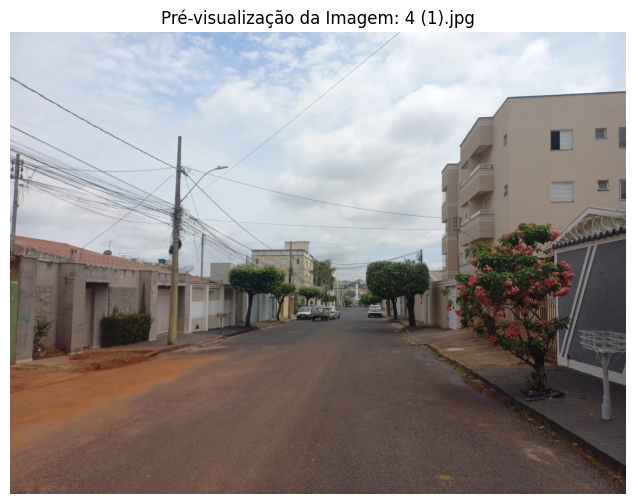

Pré-processando a imagem...


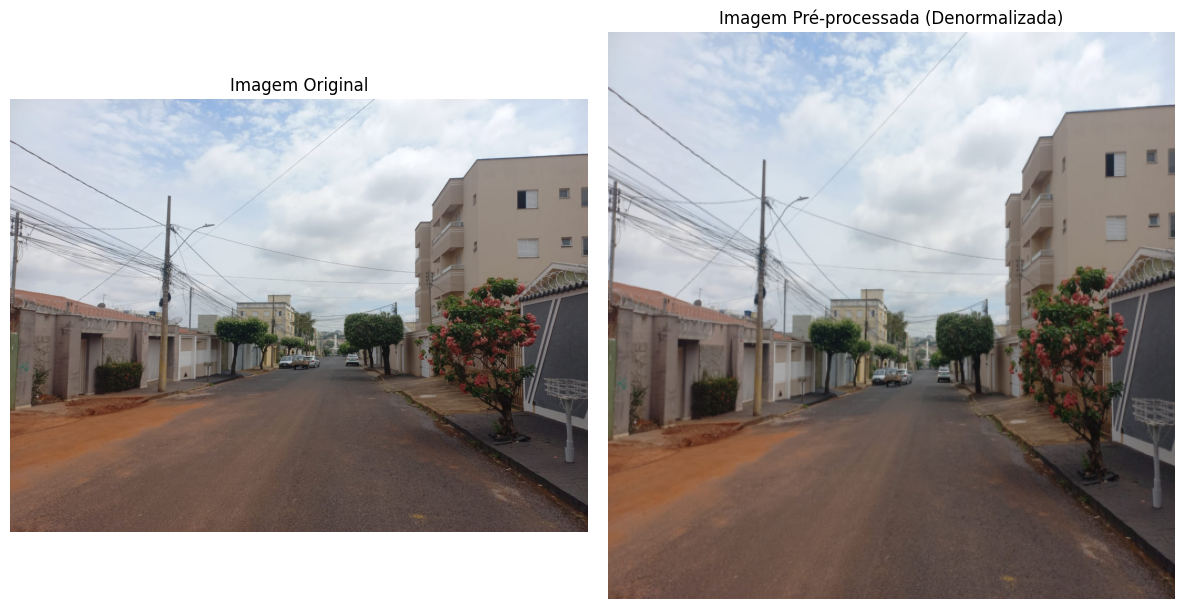

Carregando modelos de segmentação (DeepLabV3+) e detecção (YOLO)...
Carregando modelo de segmentação DeepLabV3+ (deeplabv3_resnet50_cityscapes)...
Modelo DeepLabV3 (Cityscapes) carregado e movido para cpu.
Carregando modelo de detecção YOLO (yolov8n.pt)...
Modelo YOLO carregado.
Executando segmentação semântica...
Executando segmentação semântica...
Segmentação concluída. Shape da máscara: (512, 512)
Executando detecção de postes...
Executando detecção de objetos para classes: [10, 11, 13]...
Detecção de postes concluída. 0 postes detectados.
Visualizando resultados...
Iniciando a visualização dos resultados...
Máscara de segmentação colorida criada e redimensionada.
Overlay da máscara sobre a imagem original criado.
Bounding boxes dos postes desenhadas no overlay.


/tmp/ipython-input-3606110696.py:64: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  mask_pil_raw = Image.fromarray(mask_np.astype(np.uint8), mode='P')


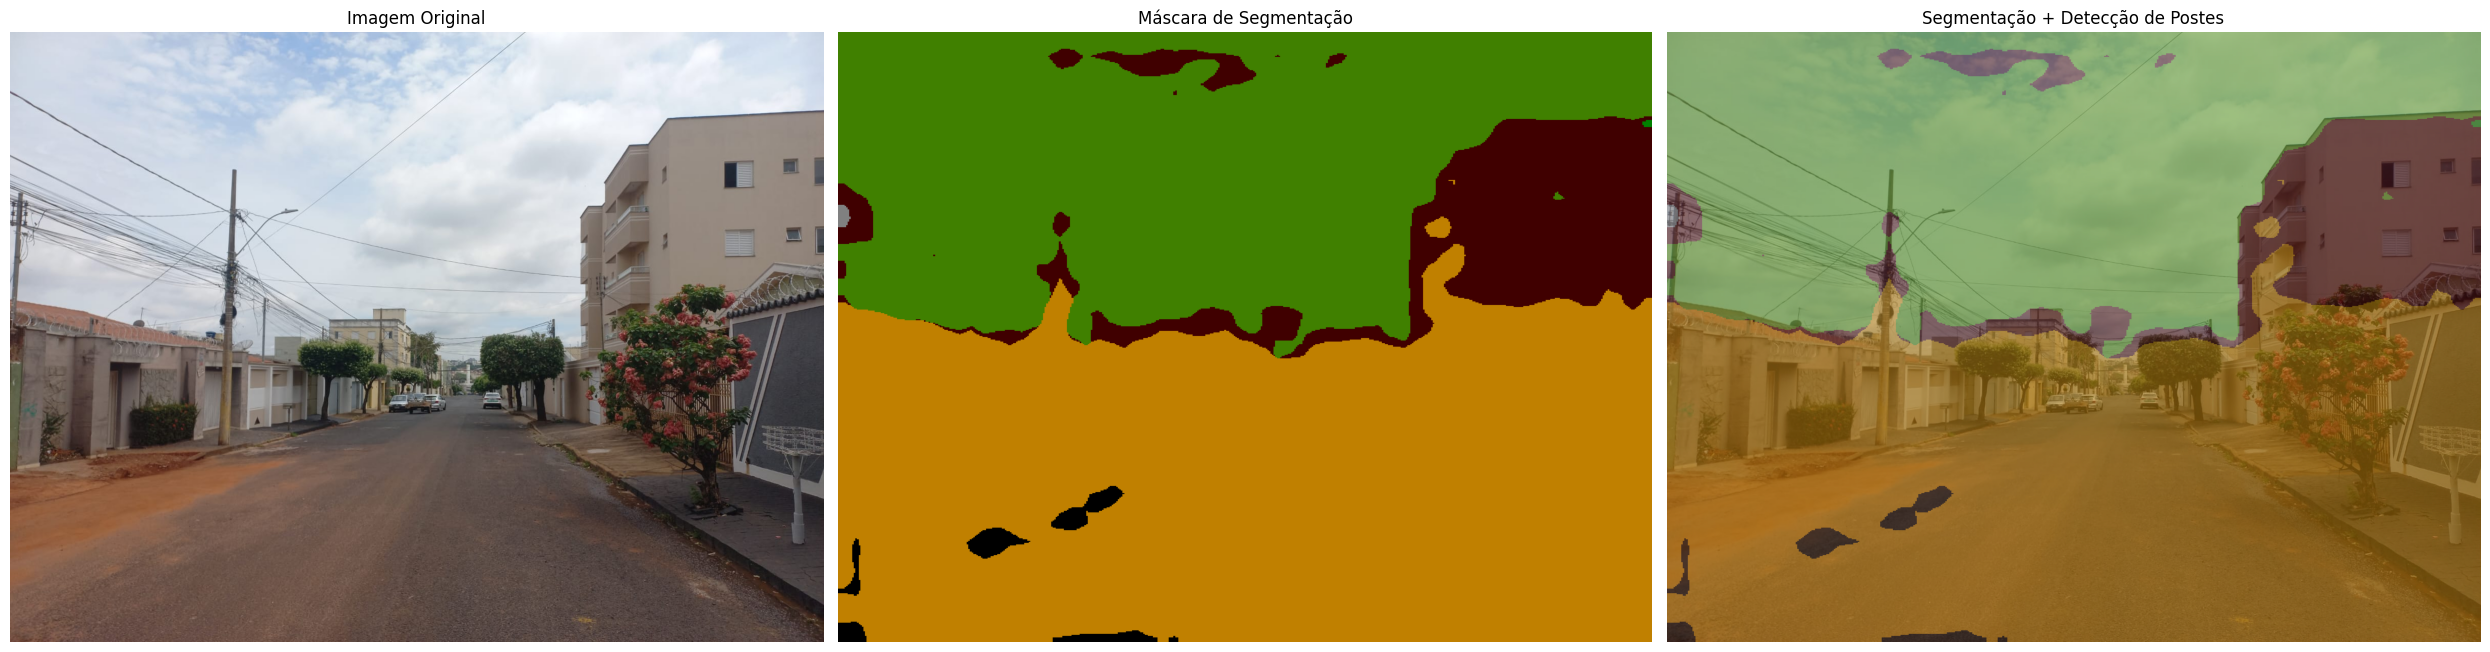

Visualização dos subplots concluída.


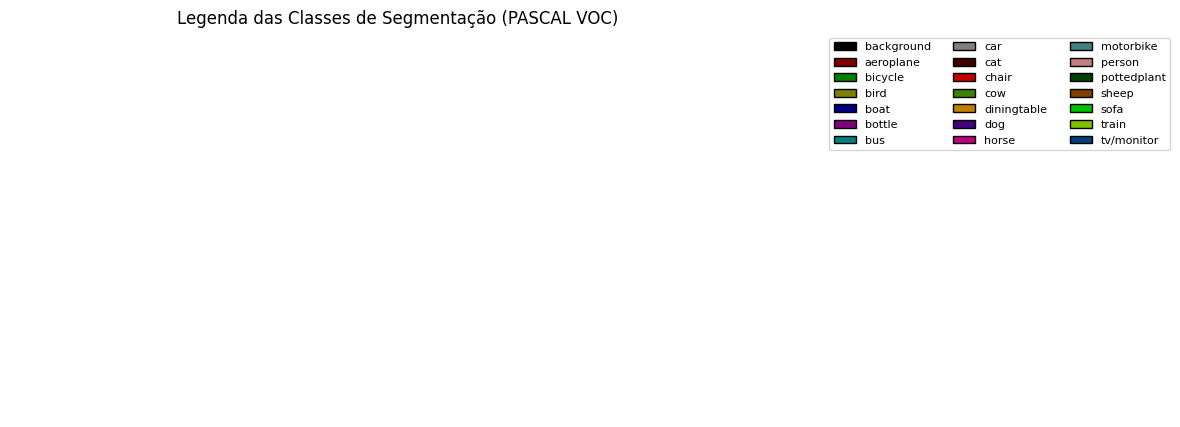

Legenda das classes de segmentação exibida.
Aplicação concluída.


In [18]:
def main():
    print("Iniciando a aplicação de segmentação e detecção.")

    # 1. Carregar imagem do usuário
    img_pil = carregar_imagem_do_usuario()
    if img_pil is None:
        print("Nenhuma imagem foi selecionada. Encerrando.")
        return

    # 2. Pré-processar a imagem
    print("Pré-processando a imagem...")
    img_tensor = preprocessar_imagem(img_pil)
    # Nota: preprocessar_imagem agora retorna apenas o tensor para o modelo.
    # A visualização da imagem pré-processada é feita dentro dela.

    # 3. Carregar modelos de segmentação e detecção
    print("Carregando modelos de segmentação (DeepLabV3+) e detecção (YOLO)...")
    modelo_seg, modelo_det = carregar_modelos()

    # 4. Rodar segmentação semântica
    print("Executando segmentação semântica...")
    mask_np = rodar_segmentacao(modelo_seg, img_tensor)

    # 5. Rodar detecção de postes
    print("Executando detecção de postes...")
    bboxes_postes = rodar_detecao_postes(modelo_det, img_pil)

    # 6. Visualizar os resultados combinados
    print("Visualizando resultados...")
    visualizar_resultados(img_pil, mask_np, bboxes_postes)

    print("Aplicação concluída.")

# Ponto de entrada da aplicação
if __name__ == "__main__":
    main()